<a href="https://colab.research.google.com/github/DButmeh/Time-Series-in-Python/blob/main/Preparing_Time_Series_from_Wide_Form_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Core) Preparing Time Series from Wide-Form Data
##**Dina Al Botmeh**

In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)



In [19]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)


In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
# set random seed
SEED = 321
np.random.seed(SEED)



In [21]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)


In [22]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


#Filter the 4 largest cities into a new dataframe

In [23]:
df2 = df[df["SizeRank"] <= 3] # filter before grouping
df2.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [24]:
null=df2.isna().sum()
null
r=df2.loc[:, null == True]
r

,2002-05-31,2004-03-31,2006-06-30,2008-03-31,2008-04-30
0,NaN,395659.0,545399.0,544562.0,541865.0
1,299197.0,423699.0,647248.0,586065.0,571226.0
2,114605.0,NaN,133505.0,136795.0,136628.0
3,208166.0,243394.0,NaN,NaN,NaN


#Melt the data to long-form and prepare it for time series analysis

In [25]:
df2.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [26]:
melted = pd.melt(df2,id_vars=['RegionID', 'SizeRank', 'RegionName',
                 'RegionType', 'StateName', 'State', 'Metro', 'CountyName'],
                value_name='Confirmed',var_name="Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Confirmed
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


#Make the datetime column the index.

In [27]:
melted['Date'] = pd.to_datetime(melted['Date'], errors='coerce')
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   Confirmed   1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [28]:
melted = melted.set_index("Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Confirmed
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [12]:
melted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   Confirmed   1087 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 85.3+ KB


In [29]:
#fill one state by one
melted.loc[melted["State"]== "NY",['Confirmed']]=melted.loc[melted["State"]== "NY",['Confirmed']].interpolate()
melted.loc[melted["State"]== "CA",['Confirmed']]=melted.loc[melted["State"]== "CA",['Confirmed']].interpolate()
melted.loc[melted["State"]== "TX",['Confirmed']]=melted.loc[melted["State"]== "TX",['Confirmed']].interpolate()
melted.loc[melted["State"]== "IL",['Confirmed']]=melted.loc[melted["State"]== "IL",['Confirmed']].interpolate()
melted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   Confirmed   1092 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 85.3+ KB


#Resample the dataframe as monthly frequency, grouped by City.

In [30]:
df_tsm = melted.groupby('RegionName').resample("MS").sum()
df_tsm=df_tsm.drop(columns=['RegionID', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName','RegionName',"SizeRank"])
df_tsm.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1092 entries, ('Chicago', Timestamp('2000-01-01 00:00:00')) to ('New York', Timestamp('2022-09-01 00:00:00'))
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Confirmed  1092 non-null   float64
dtypes: float64(1)
memory usage: 22.3+ KB


#Using unstack() for Plotting with a MultiIndex

In [31]:
unstacked =df_tsm .unstack(level=0)
unstacked

Confirmed                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [32]:
import matplotlib.ticker as mticks

In [33]:
str_fmt = mticks.StrMethodFormatter("{x:,.0f}")
str_fmt

In [34]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)


In [35]:
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")

    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(),
                       fontweight=xtick_fontweight)

    ## customize minor ticks xaxis
    ax.xaxis.set_minor_locator(loc_3months)
    #ax.xaxis.set_minor_formatter(fmt_months)#Do not label the minor ticks.
    ## customize major ticks xaxis
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')

    ##customize major ticks on yaxis
    ax.yaxis.set_major_formatter(fmt_thous)
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax



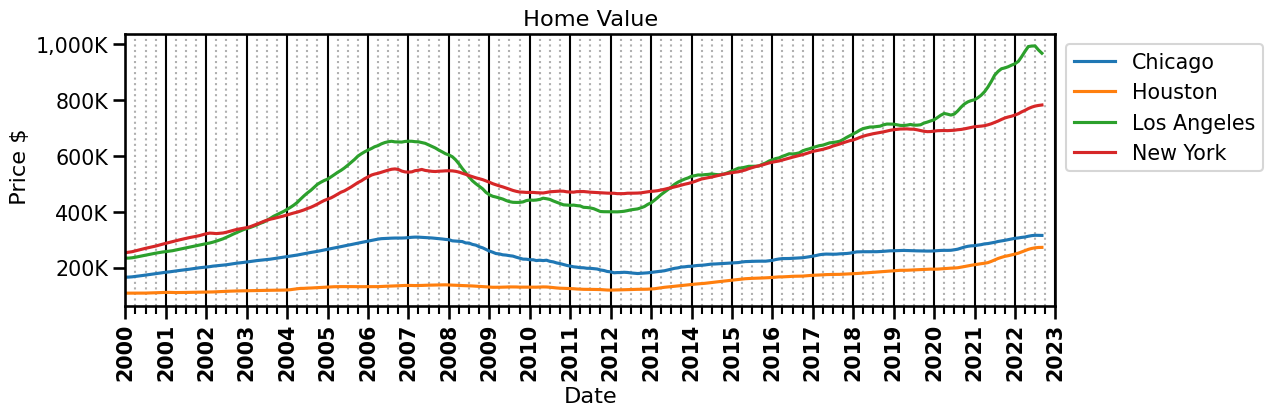

In [36]:
ax = unstacked['Confirmed'].plot(style='-',title="Home Value",x_compat=True,figsize=(12,4))
format_xdates(ax)
ax.set_ylabel(" Price $")
ax.set_xlim(['2000','2023'])#to change the range the data will be plotted over in the x axis.
ax.legend(bbox_to_anchor=[1,1]);

# A home value price of 0 indicates a month with no sales

#1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [37]:
max_p=df_tsm.loc[pd.IndexSlice[:, '2008-12'],:].max().iloc[0]
df_tsm.loc[df_tsm['Confirmed']==max_p]


,,Confirmed
RegionName,Date,
New York,2008-12-01,510309.0


In [38]:
min_p=df_tsm.loc[pd.IndexSlice[:, '2008-12'],:].min().iloc[0]
df_tsm.loc[df_tsm['Confirmed']==min_p]

,,Confirmed
RegionName,Date,
Houston,2008-12-01,131283.0


In [39]:
print('Los Angeles had the highest Typical Home Value at the end of 2008 which was 603k$')
print("Houston had the lowest Typical Home Value at the end of 2008 which was 131k$")

Los Angeles had the highest Typical Home Value at the end of 2008 which was 603k$
Houston had the lowest Typical Home Value at the end of 2008 which was 131k$


#2) How much did the home values change from November 2008 to December 2008 (in dollars)

It calculates the DIFFERENCE between each row and the prior row by default (to calculate the difference between other # of rows, you can use the periods argument.)each month and the month befor

In [40]:
ts_diff = df_tsm.diff().dropna()
ts_diff

Confirmed
RegionName Date                 
Chicago    2000-02-01      397.0
           2000-03-01      832.0
           2000-04-01     1458.0
           2000-05-01     1673.0
           2000-06-01     1509.0
...                          ...
New York   2022-05-01     6476.0
           2022-06-01     5147.0
           2022-07-01     3748.0
           2022-08-01     2268.0
           2022-09-01     1662.0

[1091 rows x 1 columns]

In [41]:
df_p=ts_diff.loc[pd.IndexSlice[:,('2008-11',"2008-12")],:] # Select all data from November 2008 to December 2008
df_p

Confirmed
RegionName  Date                 
Chicago     2008-11-01    -3790.0
            2008-12-01    -5753.0
Houston     2008-11-01     -942.0
            2008-12-01     -964.0
Los Angeles 2008-11-01    -9074.0
            2008-12-01   -12611.0
New York    2008-11-01    -3281.0
            2008-12-01    -4458.0

In [42]:
unstacked2 = df_p.unstack(level=0)
unstacked2['Confirmed']


RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-01,-3790.0,-942.0,-9074.0,-3281.0
2008-12-01,-5753.0,-964.0,-12611.0,-4458.0


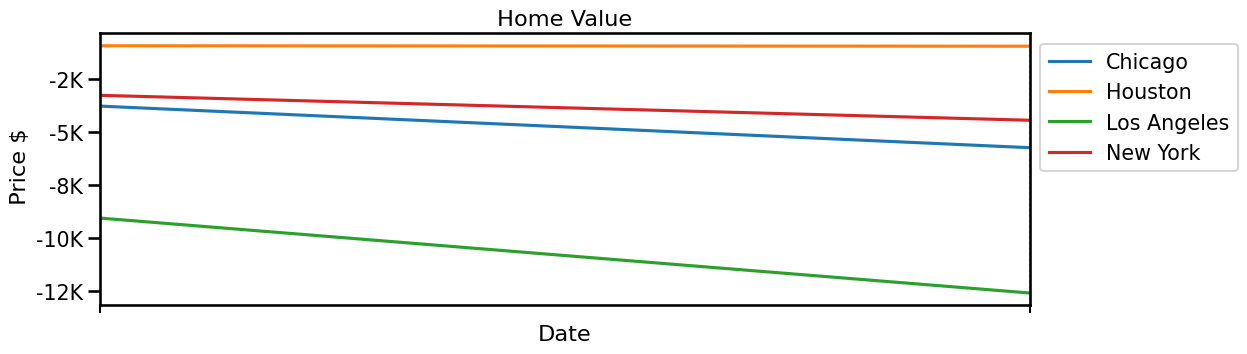

In [43]:
ax = unstacked2['Confirmed'].plot(style='-',title="Home Value",x_compat=True,figsize=(12,4))
format_xdates(ax)
ax.set_ylabel(" Price $")
ax.set_xlim(['2008-11','2008-12'])#to change the range the data will be plotted over in the x axis.
ax.legend(bbox_to_anchor=[1,1]);

In [44]:
diff=unstacked2['Confirmed'].iloc[0]-unstacked2['Confirmed'].iloc[1]
diff

,0
RegionName,
Chicago,1963.0
Houston,22.0
Los Angeles,3537.0
New York,1177.0


In [45]:
list= diff.index.get_level_values(0)
for city in list: # Unpack the tuple into date and city
    price = diff.loc[city] # Access data using both date and city
    print(f'The home values at {city} decreasing from November 2008 to December 2008 by {price}')


The home values at Chicago decreasing from November 2008 to December 2008 by 1963.0
The home values at Houston decreasing from November 2008 to December 2008 by 22.0
The home values at Los Angeles decreasing from November 2008 to December 2008 by 3537.0
The home values at New York decreasing from November 2008 to December 2008 by 1177.0
